# Projekt Autoscout24

## Daten

In [42]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
#Datensatz laden
df = pd.read_csv("autoscout24.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [3]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [4]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [5]:
df.shape

(46405, 9)

In [6]:
df.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

In [13]:
#data cleaning

#Nullwerte droppen
total_nan_values = df.isnull().sum().sum()
print(total_nan_values)
df = df.dropna()

354


## Analyse

In [16]:
#1 Wieviele Autos wurden verkauft? Uber welchen Zeitraum? 

anzahl_autos = len(df)
print("Gesamtanzahl der Autos:", anzahl_autos)

min_jahr = df['year'].min()
max_jahr = df['year'].max()

print("Zeitraum: {} bis {}".format(min_jahr, max_jahr))

Gesamtanzahl der Autos: 46071
Zeitraum: 2011 bis 2021


In [18]:
#2 Welche Marken sind erfasst?

marken = df['make'].unique()
print("Erfasste Marken:", marken)
print(len(marken))


Erfasste Marken: ['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Mitsubishi' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru' 'Dodge' 'Microcar'
 'Lamborghini' 'Lada' 'Tesla' 'Chrysler' 'McLaren' 'Aston' 'Rolls-Royce'
 'Lancia' 'Abarth' 'DS' 'Daihatsu' 'Ligier' 'Ferrari' 'Aixam' 'Zhidou'
 'Morgan' 'Maybach' 'RAM' 'Alpina' 'Polestar' 'Brilliance' 'Piaggio'
 'FISKER' 'Others' 'Cadillac' 'Iveco' 'Isuzu' 'Corvette' 'Baic' 'DFSK'
 'Estrima' 'Alpine']
71


C:\Users\ruedi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


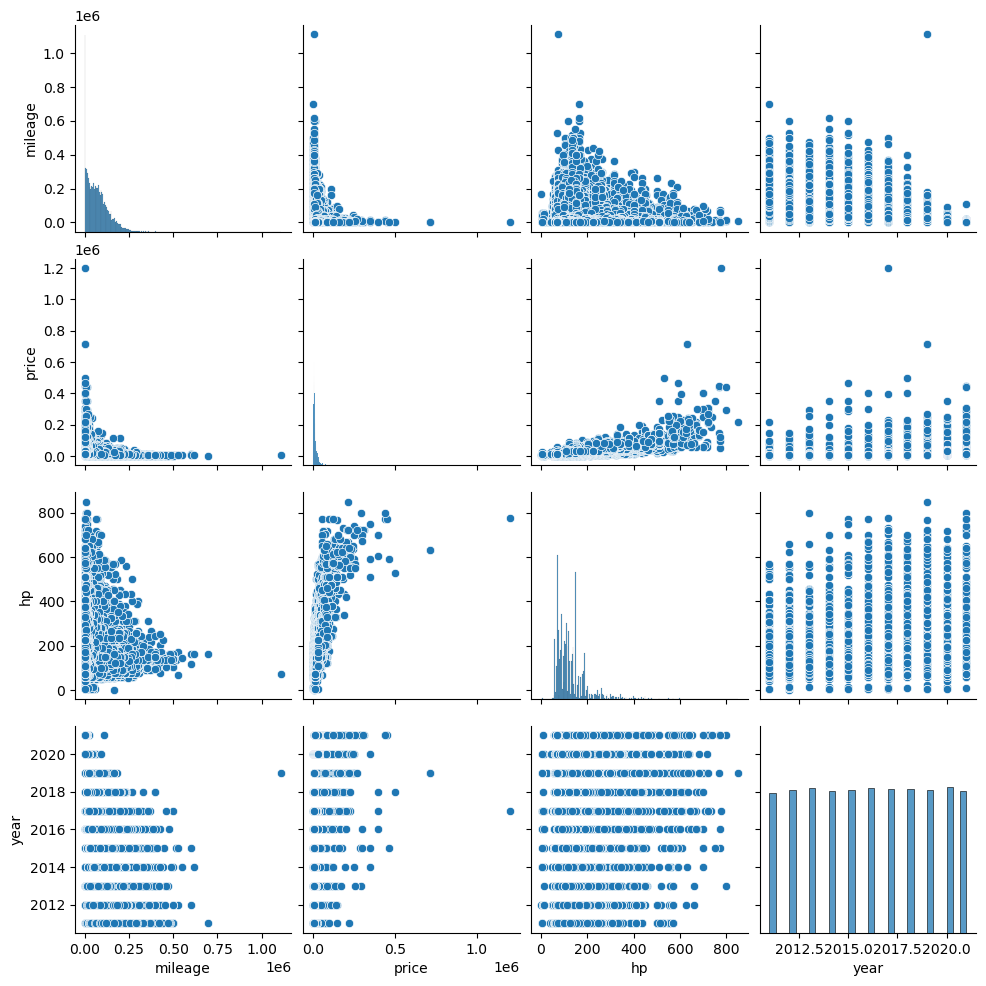

In [21]:
#3 Existieren Korrelationen zwischen den (numerischen) Features? (Scatterplots)

num_features = df[['mileage', 'price', 'hp', 'year']]

# Paarplot-Matrix
scatterplot_matrix = sns.pairplot(num_features)
plt.show()

In [22]:
korrelationsmatrix = num_features.corr()
print(korrelationsmatrix)

          mileage     price        hp      year
mileage  1.000000 -0.303550 -0.014901 -0.678053
price   -0.303550  1.000000  0.746715  0.405698
hp      -0.014901  0.746715  1.000000  0.166900
year    -0.678053  0.405698  0.166900  1.000000


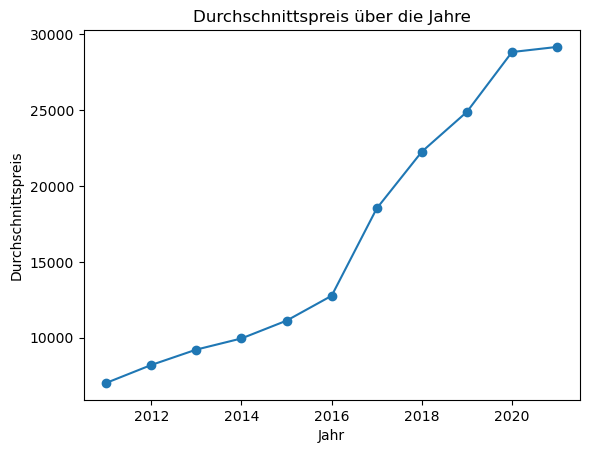

In [23]:
#4 Gibt es Veränderungen über die Jahre?

durchschnittspreise_nach_jahr = df.groupby('year')['price'].mean()

# Plotten Sie die Durchschnittspreise über die Jahre
plt.plot(durchschnittspreise_nach_jahr.index, durchschnittspreise_nach_jahr.values, marker='o')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittspreis')
plt.title('Durchschnittspreis über die Jahre')
plt.show()

## Machine Learning

In [25]:
top_5_hersteller = df['make'].value_counts().head(5).index.tolist()
print("Top 5 Hersteller:", top_5_hersteller)


Top 5 Hersteller: ['Volkswagen', 'Opel', 'Ford', 'Skoda', 'Renault']


In [38]:
df_top5 = df[df['make'].isin(top_5_hersteller)]

durchschnittspreise_pro_hersteller = df_top5.groupby('make')['price'].mean()
print("Durchschnittspreise pro Hersteller:")
print(durchschnittspreise_pro_hersteller)

Durchschnittspreise pro Hersteller:
make
Ford          13781.130612
Opel          10422.391313
Renault       11335.889685
Skoda         13720.220598
Volkswagen    16067.459244
Name: price, dtype: float64


In [39]:
sortierte_durchschnittspreise = durchschnittspreise_pro_hersteller.sort_values(ascending=False)
print("Sortierte Durchschnittspreise pro Hersteller:")
print(sortierte_durchschnittspreise)

Sortierte Durchschnittspreise pro Hersteller:
make
Volkswagen    16067.459244
Ford          13781.130612
Skoda         13720.220598
Renault       11335.889685
Opel          10422.391313
Name: price, dtype: float64


### Model 1 (LR)

In [40]:
# Features und Zielvariablen auswählen
features = df_top5[['mileage']]
target = df_top5['price']

In [43]:
# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Initialisieren des linearen Regressionsmodells
modell = LinearRegression()
# Trainieren des Modells
modell.fit(X_train, y_train)
